<a href="https://colab.research.google.com/github/Singhrahul2511/NLP_All_Experiment/blob/main/Web_scrapping(NLP1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Number of positive reviews: 7
Number of negative reviews: 1


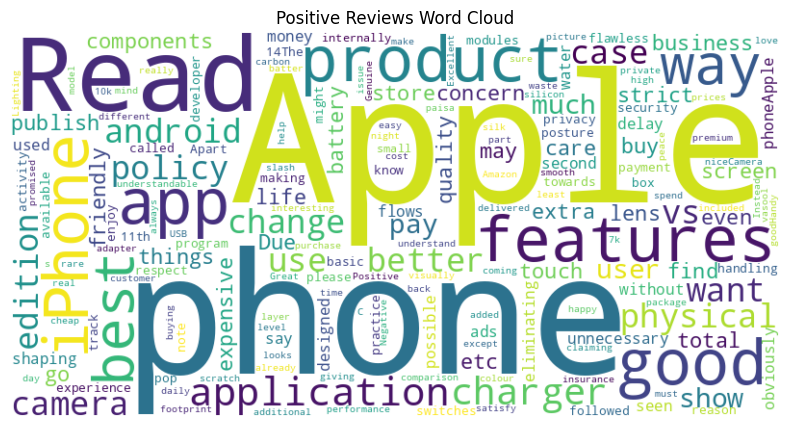

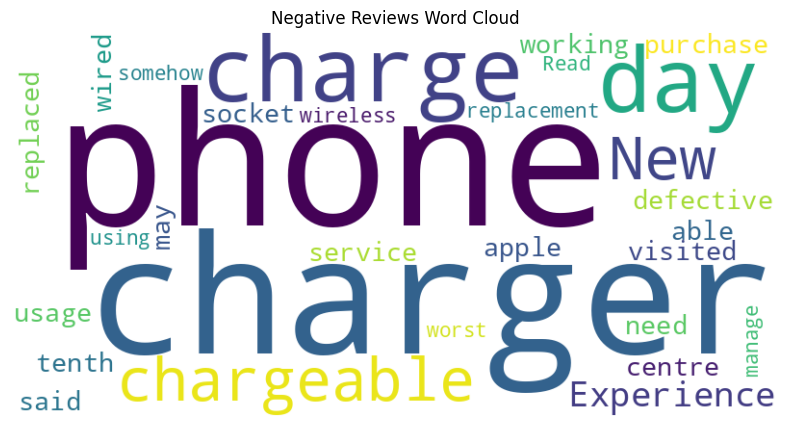

In [ ]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob
import time
import random

# List of User-Agent strings to rotate
USER_AGENTS = [
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36',
    'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:89.0) Gecko/20100101 Firefox/89.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:89.0) Gecko/20100101 Firefox/89.0'
]

# Function to scrape Amazon reviews
def get_amazon_reviews(product_url, retries=5):
    for attempt in range(retries):
        headers = {
            'User-Agent': random.choice(USER_AGENTS),
            'Accept-Language': 'en-US,en;q=0.9',
            'Accept-Encoding': 'gzip, deflate, br',
            'Connection': 'keep-alive',
            'DNT': '1',  # Do Not Track Request Header
            'Upgrade-Insecure-Requests': '1'
        }

        response = requests.get(product_url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.content, 'html.parser')
            reviews = soup.find_all('span', {'data-hook': 'review-body'})
            review_texts = [review.text.strip() for review in reviews]
            return review_texts

        print(f"Attempt {attempt + 1} failed with status code {response.status_code}. Retrying...")
        time.sleep(random.uniform(2, 5))  # Random delay between 2 to 5 seconds

    print("Failed to retrieve the page after several attempts.")
    return []

#defining sentiment analysis

def analyze_sentiments(reviews):

    positive_reviews = []
    negative_reviews = []

    for review in reviews:
        analysis = TextBlob(review)
        if analysis.sentiment.polarity > 0:
            positive_reviews.append(review)
        else:
            negative_reviews.append(review)
    return positive_reviews, negative_reviews

#generating word_cloud based +ve and -ve review
# Function to generate word cloud
def generate_word_cloud(reviews, title):
    if reviews: # Check if there are any reviews
        text = ' '.join(reviews)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No {title} to generate word cloud.") # Inform user that no word cloud can be generated

# Example product URL (replace this with the actual product page URL)
product_url = "https://www.amazon.in/gp/aw/d/B0BDK62PDX/?_encoding=UTF8&pd_rd_plhdr=t&aaxitk=9447c1b10323a5511756cea3a359e48b&hsa_cr_id=9409154380702&qid=1721903680&sr=1-1-e0fa1fdd-d857-4087-adda-5bd576b25987&ref_=sbx_be_s_sparkle_mcd_asin_0_img&pd_rd_w=XLuEt&content-id=amzn1.sym.df9fe057-524b-4172-ac34-9a1b3c4e647d%3Aamzn1.sym.df9fe057-524b-4172-ac34-9a1b3c4e647d&pf_rd_p=df9fe057-524b-4172-ac34-9a1b3c4e647d&pf_rd_r=K3SVRNWPJQE3EDV1DP4C&pd_rd_wg=uD2p3&pd_rd_r=12c43cd2-c50e-4546-9eed-e8efe800b25f"
reviews = get_amazon_reviews(product_url)
if reviews:
    positive_reviews, negative_reviews = analyze_sentiments(reviews)

    print(f"Number of positive reviews: {len(positive_reviews)}")
    print(f"Number of negative reviews: {len(negative_reviews)}")

    generate_word_cloud(positive_reviews, 'Positive Reviews Word Cloud')
    generate_word_cloud(negative_reviews, 'Negative Reviews Word Cloud')

else:
    print("No reviews found or failed to retrieve reviews.")


In [ ]:
def generate_review_words(reviews):
    words = []
    for review in reviews:
        words.extend(review.split())
    return words

positive_words = generate_review_words(positive_reviews)
negative_words = generate_review_words(negative_reviews)

#To print list of +ve or -ve reviews
print("Positive Review Words:")
print(positive_words)

print("\nNegative Review Words:")
print(negative_words)


Positive Review Words:
['About', 'the', 'phoneApple', 'phone', 'without', 'a', 'second', 'delay,', 'I', 'would', 'say', 'it', 'is', 'better', 'than', 'all', 'android', 'phones', 'I', 'have', 'used.', 'The', 'phone', 'is', 'like', 'water,', 'it', 'flows', 'in', 'a', 'way', 'you', 'want', 'and', 'shaping', 'in', 'your', 'way.', 'In', 'a', 'best', 'way', 'possible,', 'the', 'phone', 'is', 'designed', 'to', 'only', 'show', 'what', 'the', 'user', 'wants', 'and', 'eliminating', 'unnecessary', 'ads,', 'features', 'that', 'I', 'have', 'seen', 'in', 'android.Why', 'it', 'is', 'better', 'than', 'Android?You', 'pay', 'too', 'much', 'money', 'for', 'Apple', 'products,', 'obviously', 'you', 'experience', 'the', 'features,', 'physical', 'components', ',', 'camera', 'lens', 'etc.', 'Apart', 'from', 'basic', 'things,', 'you', 'can', 'also', 'enjoy', 'the', 'best', 'applications', 'available', 'in', 'app', 'store.', 'If', 'you', 'are', 'a', 'developer', 'you', 'might', 'know', 'the', 'app', 'store', 'p